In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [4]:
df.pop("Posted On")
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [5]:
def check(df):
    l=[]
    column = df.columns
    for i in column:
        null = df[i].isnull().sum()
        dt = df[i].dtypes
        nunique = df[i].nunique()
        l.append([i,dt,null,nunique])
    df2 = pd.DataFrame(l)
    df2.columns=["Row","datatype","null values","unique values"]
    return df2

In [6]:
check(df)

,Row,datatype,null values,unique values
0,BHK,int64,0,6
1,Rent,int64,0,243
2,Size,int64,0,615
3,Floor,object,0,480
4,Area Type,object,0,3
5,Area Locality,object,0,2235
6,City,object,0,6
7,Furnishing Status,object,0,3
8,Tenant Preferred,object,0,3
9,Bathroom,int64,0,8


In [7]:
for j in df.columns:
    if(df[j].dtypes!= 'int64'):
      try:
        for u in df[j]:
          u=int(u)
      except ValueError:
        df.pop(j)
check(df)

,Row,datatype,null values,unique values
0,BHK,int64,0,6
1,Rent,int64,0,243
2,Size,int64,0,615
3,Bathroom,int64,0,8


<AxesSubplot: >

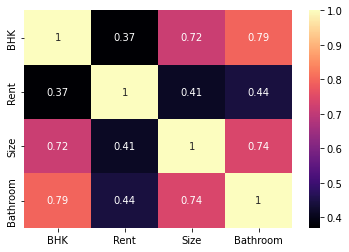

In [71]:
import seaborn as sns
z = df.corr().round(5)
sns.heatmap(z,annot=True,cmap='magma')

In [12]:
def gra(df):
    for k in df.columns:
        img=px.histogram(df,x=k,template="plotly_dark",color=k)
        img.show()

In [13]:
gra(df)

In [15]:
a=df.copy()
a=a.pop("Rent")

In [30]:
x_train,x_test,y_train,y_test=train_test_split(df,a,test_size=0.2)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
ypred=lr.predict(x_test)
ypred.shape

(950,)

In [47]:
y_test.shape

(950,)

In [54]:
ypred.shape[0]!=y_test.shape[0]

False

In [76]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [59]:
r2_score(y_test,ypred,sample_weight=None)

1.0

In [63]:
mean_squared_error(y_test,ypred,sample_weight=None,squared=True)

4.8239602225126496e-21

([<matplotlib.patches.Wedge at 0x1e7a3f41150>,
 [Text(1.0999990139204592, 0.0014728794986758234, ''),
  Text(1.0999604474825355, 0.00932812810913744, ''),
  Text(1.0998642480952345, 0.017281081039814288, ''),
  Text(1.099822944267119, 0.01973553302056272, ''),
  Text(1.0992633710797572, 0.04024973294778445, ''),
  Text(1.098288499969489, 0.0613381678465368, ''),
  Text(1.0981687566943779, 0.06344589679659822, ''),
  Text(1.0980508157507816, 0.06545537433277214, ''),
  Text(1.097914114788273, 0.06770964885954499, ''),
  Text(1.0976717408504901, 0.0715314569840062, ''),
  Text(1.0963807465483943, 0.08915861482765337, ''),
  Text(1.0950608377725723, 0.10412378007368046, ''),
  Text(1.094682071678979, 0.1080331520627775, ''),
  Text(1.094158710167309, 0.11321094012952694, ''),
  Text(1.0938412406764804, 0.11623829057302176, ''),
  Text(1.0935526034485148, 0.1189230990639562, ''),
  Text(1.0907222889774455, 0.14256538264179605, ''),
  Text(1.087284313883674, 0.16677176254542672, ''),
  Text

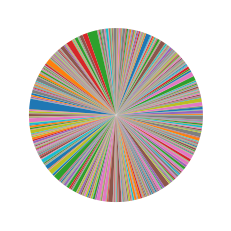

In [101]:
plt.pie(ypred)